In [7]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# load in csv
df = pd.read_csv('6-class-csv.csv')
features = df.iloc[:, [i for i in range(df.shape[1]) if i != 4]]
labels = df.iloc[:, 4]

print(labels)
print(features)

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64
     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000      

/var/folders/5g/f_r8b_2j327c0wzskk6c8tbm0000gn/T/ipykernel_71870/1940394858.py:38: UserWarning: Glyph 9737 (\N{SUN}) missing from font(s) Arial.
  plt.tight_layout()
/Users/aiden/miniconda3/envs/data-science/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9737 (\N{SUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


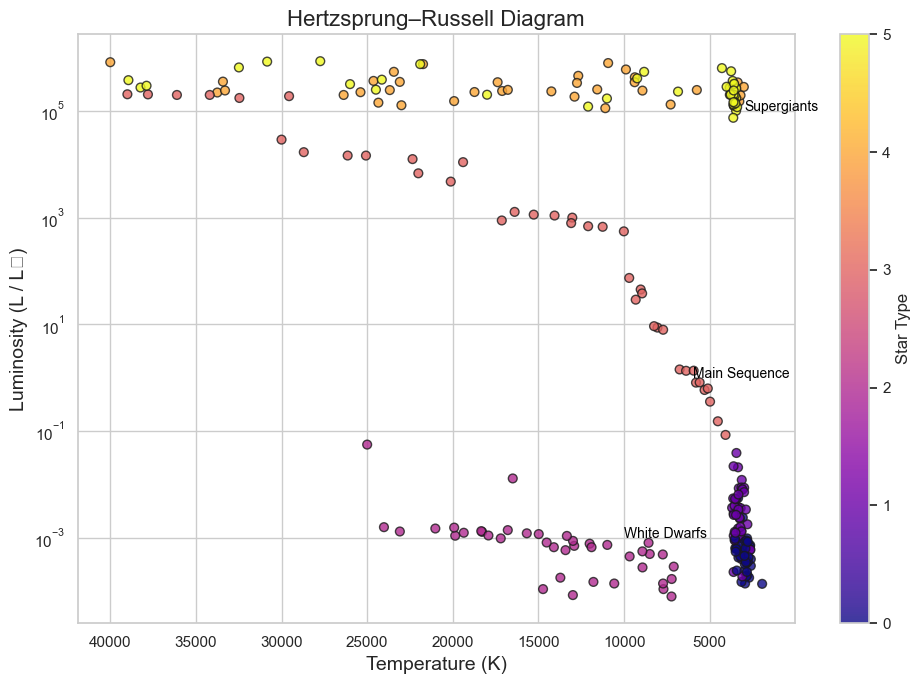

In [ ]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(10, 7))

scatter = plt.scatter(df["Temperature (K)"], df["Luminosity(L/Lo)"], c=df["Star type"], cmap="plasma", s=40, edgecolors="k", alpha=0.8)

# weird axes settings for HR diagram
plt.gca().invert_xaxis() # reverse because temp decreases
plt.yscale("log") # log scale for luminosity

# titles/labels
plt.title("Hertzsprung–Russell Diagram", fontsize=16)
plt.xlabel("Temperature (K)", fontsize=14)
plt.ylabel("Luminosity (L / Lo)", fontsize=14)

# add star type color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Star Type")

# add annotations for star types
plt.text(3000, 1e5, "Supergiants", color="black", fontsize=10)
plt.text(6000, 1, "Main Sequence", color="black", fontsize=10)
plt.text(10000, 1e-3, "White Dwarfs", color="black", fontsize=10)

plt.tight_layout()
plt.show()